# El planteamiento del ejercicio es el siguiente:

El archivo transaccional_muestra.csv contiene un mes de transacciones de una empresa de retail; es un ejemplo similar a los datos con los que trabajamos habitualmente. En este ejercicio te pedimos lo siguiente:

## 1. Primero dale una mirada a los datos para familiarizarte con ellos; los nombres de las columnas son auto explicativos.</b>


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Convistiendo el archivo .csv a data frame df. 
df = pd.read_csv("transaccional_muestra.csv")

<b> Para familiarse con los datos podemos usar .info, .head, .describe como se muestra a continaucion. </b>
<!-- Para familiarse con los datos podemos usar .info, .head, .describe como se muestra a continaucion.  -->

In [18]:
# Para familiarse con los datos podemos usar .info, .head, .describe como se muestra a continaucion. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266617 entries, 0 to 266616
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_transaccion  266617 non-null  int64  
 1   id_fecha        266617 non-null  object 
 2   id_tienda       266617 non-null  int64  
 3   id_cliente      266617 non-null  object 
 4   monto           266617 non-null  float64
 5   unidades        266617 non-null  int64  
 6   id_producto     266617 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 14.2+ MB


In [19]:
# Valores representativos para el analisis de manera rapida
df.describe()

,id_transaccion,id_tienda,monto,unidades,id_producto
count,2.666170e+05,266617.000000,266617.000000,266617.000000,2.666170e+05
mean,8.168497e+04,10.128038,40.747171,1.035778,2.116181e+05
std,1.313679e+05,9.621381,86.104906,0.452394,3.480063e+05
min,0.000000e+00,1.000000,-3554.935162,1.000000,0.000000e+00
25%,3.881000e+04,3.000000,10.674900,1.000000,2.611000e+03
50%,7.705900e+04,7.000000,22.841575,1.000000,2.542700e+04
75%,1.168780e+05,12.000000,42.656136,1.000000,2.149330e+05
max,4.237486e+06,49.000000,3554.935162,53.000000,1.313809e+06


In [20]:
df['id_cliente'].value_counts()


14e8e09751058711deec7f160f2b34ec    80541
57aad9040e3a5406451afbac74573782      352
445055d84c2814b3eeac6261f6a93866      312
256d3bf9e859eb808ecc6d72d4151405      273
b183a2bb644e8cbc56f263631634e438      106
                                    ...  
6febe3d9d9ff18ee3ae78ae4b51b0085        1
7dc9040661aedc4997f7c2401a544ba8        1
c4a3a78be697ebb031356c20b7b7c6e9        1
3cbd45651d1fa8dfceb779d40b7e0933        1
fb1aee1ebf7ed3e21daccbef2f5665ea        1
Name: id_cliente, Length: 65433, dtype: int64

In [21]:
# Imprimiendo las primeros 5 lineas (rows)
df.head()

,id_transaccion,id_fecha,id_tienda,id_cliente,monto,unidades,id_producto
0,3420,2018-03-02,1,14e8e09751058711deec7f160f2b34ec,9.176690,1,3523
1,2293,2018-03-02,11,bca2a43470e6f1097013d8a01ad2df73,16.691722,1,4883
2,2519,2018-03-02,1,a0b7648eed7a4f1da33f7de962f104b1,500.985471,1,209
3,2520,2018-03-02,1,546d432da6034e5a355c92192c09c687,30.043430,1,1127
4,3457,2018-03-02,1,14e8e09751058711deec7f160f2b34ec,9.176690,1,23945


De la tabla anterior podemos ver que tenemos diferentes tiendas.\
Como un punto de partida yo analizaría la tienda, el producto, y el cliente mas repetidos en esta data.. 

In [22]:
# Las 5 tiendas que mas aparecen en la data.
new_df_t = df['id_tienda'].value_counts().head(100).rename_axis('id_tienda').reset_index(name='veces encontrado')
new_df_t

,id_tienda,veces encontrado
0,3,40724
1,6,30215
2,4,26433
3,34,24343
4,12,22500
5,10,19255
6,1,15899
7,13,13217
8,16,13214
9,2,12864


In [23]:
# Los clientes que mas aparecen en la data.
new_df_c = df['id_cliente'].value_counts().rename_axis('id_cliente').reset_index(name='cantidad encontrada')
new_df_c

,id_cliente,cantidad encontrada
0,14e8e09751058711deec7f160f2b34ec,80541
1,57aad9040e3a5406451afbac74573782,352
2,445055d84c2814b3eeac6261f6a93866,312
3,256d3bf9e859eb808ecc6d72d4151405,273
4,b183a2bb644e8cbc56f263631634e438,106
...,...,...
65428,6febe3d9d9ff18ee3ae78ae4b51b0085,1
65429,7dc9040661aedc4997f7c2401a544ba8,1
65430,c4a3a78be697ebb031356c20b7b7c6e9,1
65431,3cbd45651d1fa8dfceb779d40b7e0933,1


In [24]:
# Los productos mas repetidos.
df['id_producto'].value_counts().head()
new_df_p = df['id_producto'].value_counts().rename_axis('id_producto').reset_index(name='cantidad encontrado')
new_df_p

,id_producto,cantidad encontrado
0,2611,11116
1,6067,5737
2,271,3513
3,40,2749
4,759,2733
...,...,...
14325,418121,1
14326,656251,1
14327,187580,1
14328,51612,1


##    Podemos observar lo siguiente:

<br>

<li>Diferentes tiendas.</li>
<li> Se realizaron 266617 transaciones/mes.</li>
<li>La columna monto tiene valores negativos.</li>
<li>El monto mayor fue 3554 y la misma cantidad pero en negativo. Requiere análisis.</li>
<li>Solo hay 6 columnas de las cuales 4 corresponde a identificaciones (id).</li>
<li>La unidad máximas por transacción fue 53.</li>
<li>Hay 19 tiendas.</li>
<li>El id de la última tienda es 49.</li>
<li>Hay 65432 clientes.</li>
<li>Hay 14329 productos.</li>
<li>A este punto la data no tiene valores sin datos, nulos (null).</li>

Se generan otras preguntas como:

    1) En qué tienda compra mas x cliente?.
    2) X producto en que tienda se vende mas?.
    3) ¿Cuánto dinero genera x tienda?
    4) Cuánto dinero gasta x tienda/mes comparado con la tienda que mas vende. 
    5) Cuánto dinero gasta la tienda que mas vende. 

Que serán contestadas al final del proyecto.

## 2. ¿Hay outliers? Si hay, identifícalos y explica por qué los consideraste así.




La únicas columnas que podrían tener data para analizar si tienen outliers son monto y unidades. 
Este análisis se puede realizar analizando la data como un todo tomando las 266617 transacciones o agrupandolas de acuerdo a la tienda, cliente o producto. 

#### Primer caso data completa:
Hay varios métodos para determinar outliers el mas común boxplot. El outlier en este caso está determinado por estar fuera del mínimo punto y máximo punto. El mínimo y máximo punto está determinado por estar 25% lejano al Q1 y Q3 respectivamente, como se muestra a continuación. 



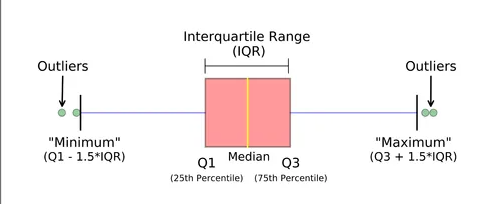

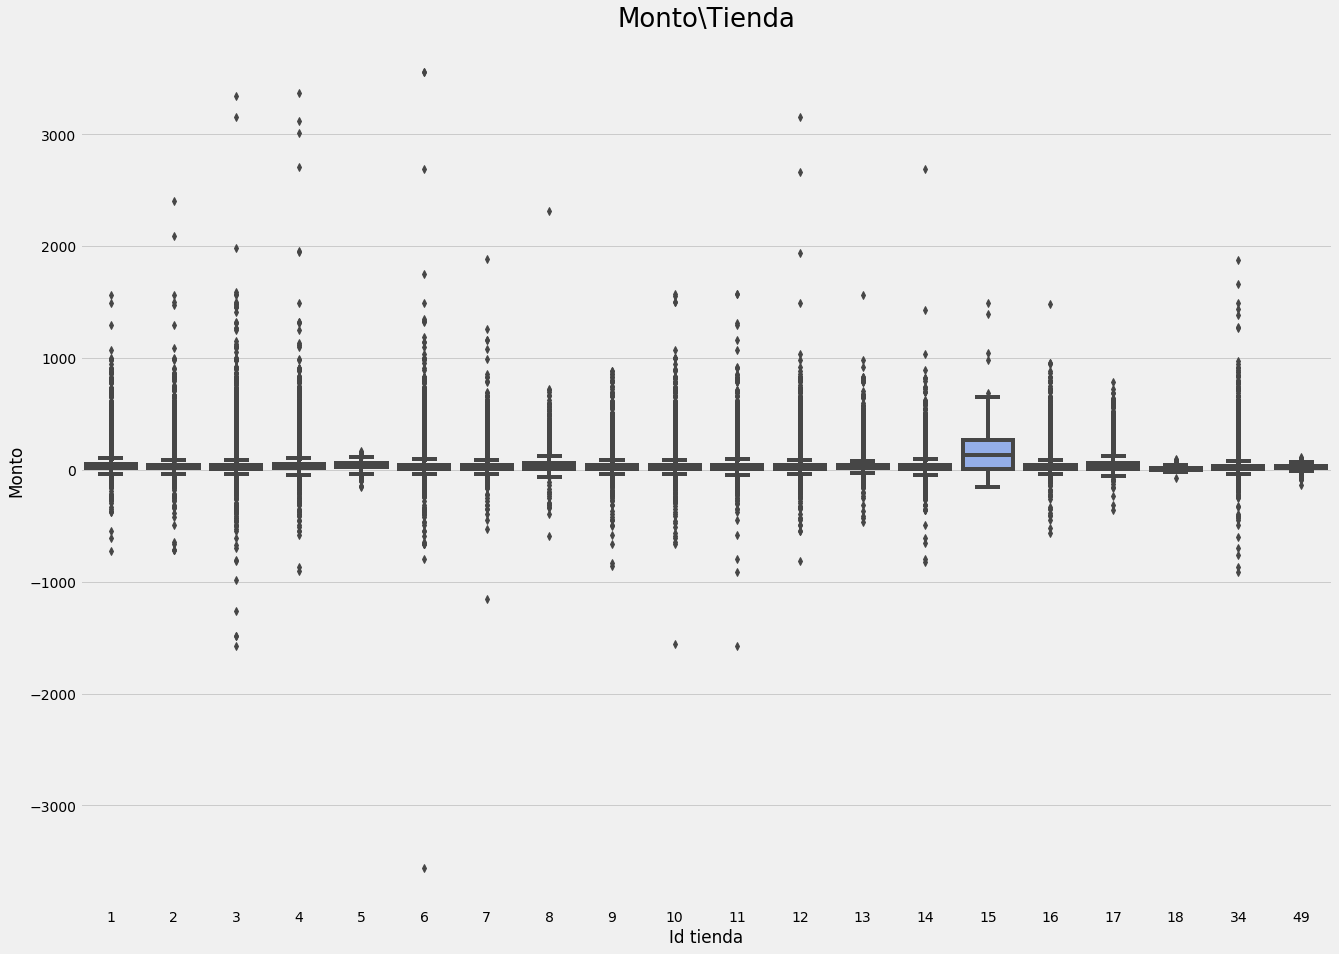

In [25]:
# Box plots to visualize distributions

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,15))
sns.boxplot(y = 'monto', x = 'id_tienda', data = df)
plt.title('Monto\Tienda', fontsize = 26)
plt.ylabel('Monto')
plt.xlabel('Id tienda')
plt.show()

### Evidentemente tenemos outliers en toda la data. 
Quiero ver la representación gráfica de los montos por tienda por tal motivo voy a graficarlos.

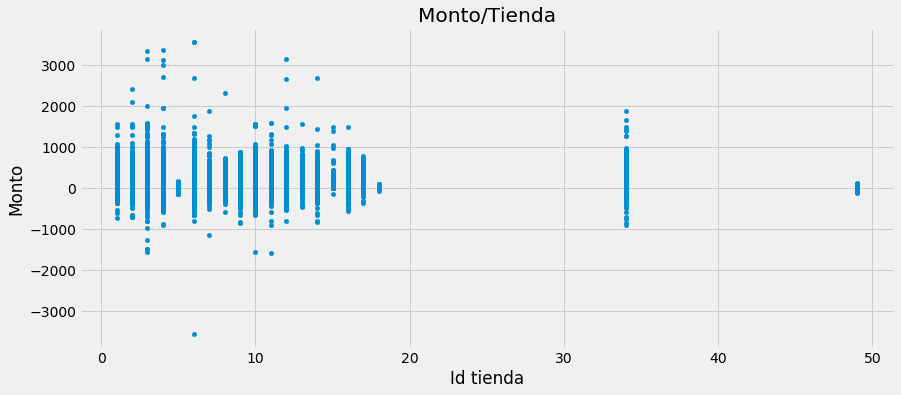

In [26]:
ax = df.plot(y='monto', x='id_tienda', kind='scatter',  legend = True, figsize = (13,5.5))
ax.set_title('Monto/Tienda')
plt.ylabel('Monto')
plt.xlabel('Id tienda')
plt.show()

# 3. Trabajando sólo con los datos que correspondan a compras:
 3.1. Calcula el indicador "Transacciones por cliente" para cada tienda, y describe la distribución del indicador
 
 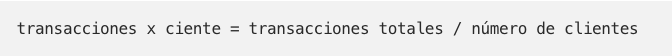
 
Describe la capacidad para lograr que sus clientes regresen a comprar N número de veces.\
<!--   -->
 ### Para realizar esto voy a crear un nueva data frame llamado df_transaciones donde se pueda visualizar el id_tienda y indicador transacciones por cliente.

In [27]:
df_transaciones = pd.DataFrame(columns=['id_tienda', "Transacciones por cliente"])

# Asumiendo que los montos positivos representan las compras
df_negativo = df[df["monto"]<0]
df = df[df["monto"]>0]


for i in new_df_t["id_tienda"]:
    new_data = df[df["id_tienda"]==i]
    clientes = new_data["id_cliente"].nunique()
    transaciones = new_data.size
    transacciones_cliente = round(transaciones / clientes)
    df_transaciones.loc[i] = [i, transacciones_cliente]

df_transaciones = df_transaciones.set_index("id_tienda").reset_index().sort_values(
    by=["Transacciones por cliente"], ascending=False)

# 3.2. Calcula el indicador "Ticket promedio" (es decir, el monto total promedio por cada transacción) para cada tienda.

 ### Para realizar esto voy a crear un nueva data frame llamado df_ticket donde se pueda visualizar el id_tienda y el indicador Ticket Promedio.


In [28]:
df_ticket = pd.DataFrame(columns=['id_tienda', "Ticket_promedio"])

for i in new_df_t["id_tienda"]:
    montos = df.loc[df["id_tienda"] == i, 'monto'].sum()
    new_data = df[df["id_tienda"]==i]
    clientes = new_data["id_transaccion"].nunique()
    ticket_promedio = round(montos / clientes)
    df_ticket.loc[i] = [i, ticket_promedio]

df_ticket = df_ticket.set_index("id_tienda").reset_index().sort_values(by=["Ticket_promedio"])

###  Voy a unir los dos dataframes para contestar ambas respuesta en una sola tabla y gráfica.

In [29]:
df_graph = df_transaciones.join(df_ticket.set_index('id_tienda'), on='id_tienda').set_index("id_tienda")
df_graph

,Transacciones por cliente,Ticket_promedio
id_tienda,,
10.0,58.0,67.0
9.0,41.0,81.0
34.0,39.0,62.0
5.0,36.0,56.0
2.0,35.0,77.0
17.0,29.0,108.0
12.0,28.0,67.0
13.0,28.0,70.0
1.0,27.0,80.0


###   3.2.1. ¿A qué se puede deber las diferencias en ticket promedio entre las distintas tiendas
Factores como productos disponibles, ubicación, precio, tipo de cliente pueden afectar estos indicadores.\
Analisemos la disponiblidad de productos y la diferencia de precios para el mismo producto entre la diversas tiendas considerando que solo venden los ítem que ya vendieron.

### Disponibilidad de productos

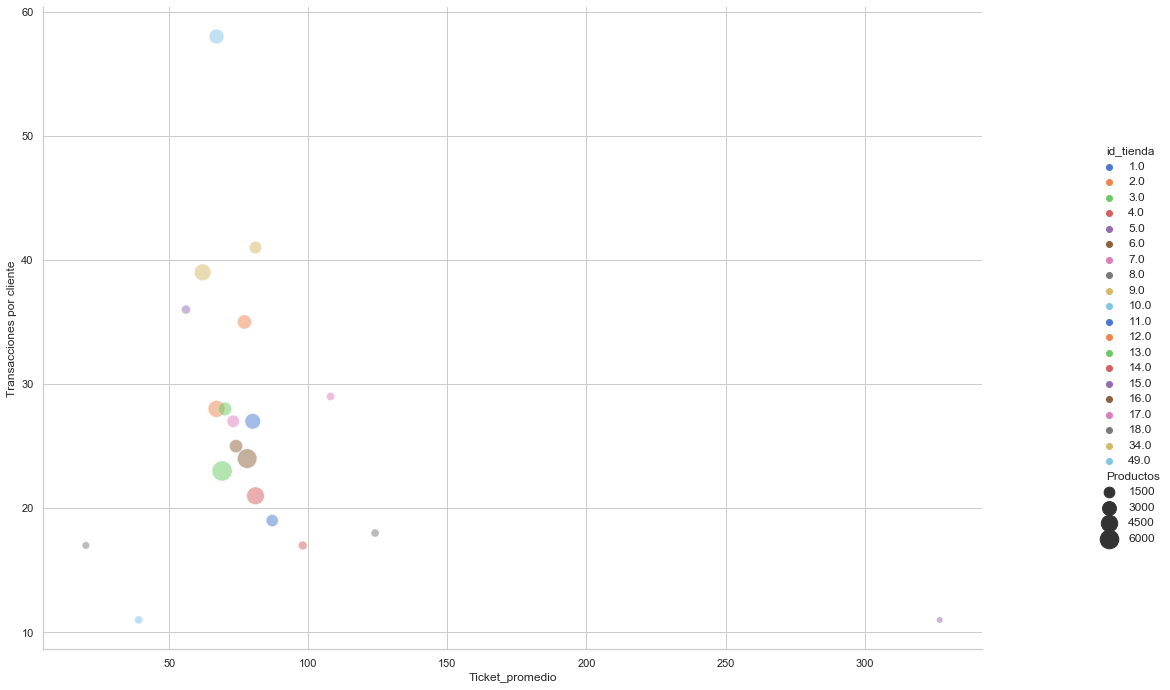

In [30]:
df_productos = pd.DataFrame(columns=['id_tienda', "Productos"])
# Asumiendo que los montos positivos representan las compras

for i in new_df_t["id_tienda"]:
    new_data = df[df["id_tienda"]==i]
    productos = new_data["id_producto"].nunique()
    df_productos.loc[i] = [i, productos]

df_productos = df_productos.sort_values(by=["Productos"], ascending=False)
df_productos = df_graph.join(df_productos.set_index('id_tienda'), on='id_tienda')

sns.set_theme(style="whitegrid")
# Plot miles per gallon against horsepower with other semantics
t = sns.relplot(x="Ticket_promedio", y="Transacciones por cliente", hue="id_tienda", size="Productos",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_productos)
t.fig.set_figwidth(17)
t.fig.set_figheight(10)

Se interpreta que para tener un ticket promedio mayor a 140 usd y una transacción por cliente mayor a 20 se requiere tener un stock superior o igual a 600 artículos diferentes. Con excepción de dos tiendas 7 y 5 que requieren otro tipo de análisis.


### Precio entre tiendas por mismo producto.

In [31]:
# Reduciendo la data a donde las unidades compradas son una sola para simplicidad del precio
df_uni = df[df["unidades"] == 1]
df_id_productos = df_uni["id_producto"].unique()
len(df_id_productos.tolist())
# Tenemos un total de 14244 productos diferentes.

14244

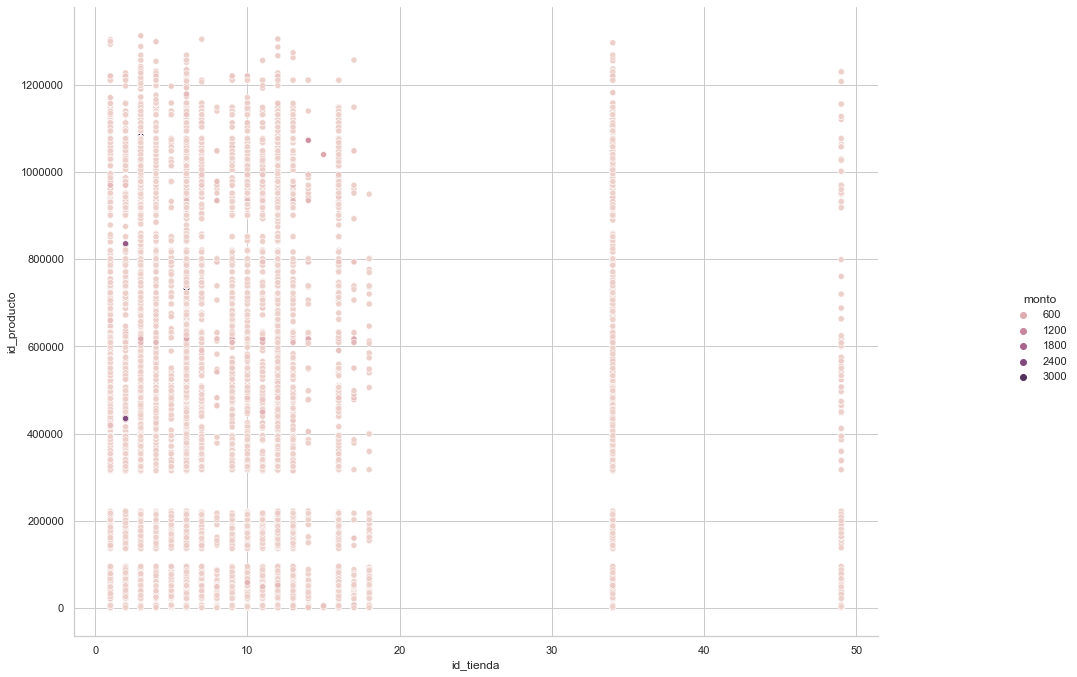

In [32]:
g = sns.relplot(x="id_tienda", y="id_producto", hue="monto", data=df_uni);
g.fig.set_figwidth(17)
g.fig.set_figheight(10)

Se observa variación de precios entre el mismo producto para diversas tiendas. Ahora para analizar este comportamiento y ver si afecta el índice necesitaría analizar el comportamiento de compra de un mismo cliente entre diversas tiendas para el mismo producto. 

## 4. La compañía desea hacer una segmentación básica de sus clientes. La idea es determinar un segmento de los "clientes VIP", es decir, sus mejores clientes, versus el resto de los clientes.
4.1. Si sólo tuvieras acceso a estos datos, ¿cuál sería tu recomendación a la compañía? ¿Qué clientes elegirías y con qué parámetros los seleccionarías?\
Los dos principales escenarios para esta situación son:
    <li>Gastadores</li>
    <li>Compradores frecuentes</li>


### Grandes Gastadores

Para analizar esto voy a crear una variable que usted pueda modificar de acuerdo a su criterio para determinar el punto donde usted considere se divida las personas que mas gastan de las que no. Dicha división será la multiplicación  de la sumatoria total del monto comprado * porcentaje equivalente. 

#### Nombre variable = porcentaje equivalente

Por ejemplo:\
              división = monto total * porcentaje equivalente
              
El monto total es la suma de todos los montos positivos menos los montos negativos considerando que los montos negativos corresponde a retorno de algún producto.

In [33]:
total_positivo = df["monto"].sum()
total_negativo = df_negativo["monto"].sum() 
monto_total = total_positivo + total_negativo
str = "El monto positivo es {}, el monto negativo es {}, el monto Total es {}"
print(str.format (total_positivo, total_negativo, monto_total))

El monto positivo es 11395654.43103316, el monto negativo es -531765.9663452666, el monto Total es 10863888.464687893


#### El resultado final será una representación gráfica de todos los clientes con una línea divisoria de donde está el monto que determina la diferencia entre los clientes que mas gastan de los que no. 

El id_cliente para el análisis posterior no es relevante dado que voy a filtrar los clientes por el monto gastado en el mes y Seaborn no puede interpretar la estructura del id actual voy a cambiar el id del cliente por un número random. Al obtener el monto podemos filtrar los clientes nuevamente con el monto obtenido y crear la lista de los clientes deseados (VIP).




In [34]:
porcentaje_equivalente = 0.2

# Agregando el id, debido a que solo quiero realizar una representacion grafica para determinar
import random
random.seed(42)

df = df.copy()
df['new_id']  = np.random.randint(1, 10000, df.shape[0])

df.sort_values(by=["monto"], ascending=False)
uniques_montos = sorted(df["monto"].unique().tolist(), reverse=True)

total_div = round(total*porcentaje_equivalente)

for each in uniques_montos:
    new_suma = df[df["monto"] >= each]
    suma = new_suma["monto"].sum()
    if suma >= total_div:
        monto_equi = each
        break

divisor_monto = monto_equi
clientes = df[df["monto"]>monto_equi]['id_cliente'].unique().tolist()

print("Monto que divide los clientes VIP:", divisor_monto)
print("La cantidad de clientes para cubrir esta exigencia es:", len(clientes), "y la lista se encuentra en la variable clientes.")

# Plot miles per gallon against horsepower with other semantics
sns.set_theme(style="whitegrid")
b = sns.relplot(x="new_id", y="monto", hue="id_tienda", size="monto",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)
plt.plot([0, 10000], [divisor_monto, divisor_monto], linewidth=2, color="black")
b.fig.set_figwidth(17)
b.fig.set_figheight(10)

NameError: name 'total' is not defined

### Quiero ver graficamente el aporte de cada una de las tiendas a esta division. 

In [ ]:
df_mayor = df[df["monto"] > divisor_monto]

In [ ]:
d = sns.catplot(x='id_tienda', y='monto', data=df_mayor_20, alpha=0.3,jitter=0.2,color='k')
d.fig.set_figwidth(14)
d.fig.set_figheight(6)


Aporte de clientes por cada una de las tiendas a la sumatoria de monto.

### Compradores frecuentes
<!--  -->
Voy a graficar la frecuencia con relacion a la sumatoria del monto gastado por cliente. 

In [ ]:
df1 = df.groupby(["id_cliente"])['monto'].sum()
df2 = df.groupby(["id_cliente"])['id_cliente'].count()

result = pd.concat([df1, df2], axis=1, join='inner')
result.columns = ["monto", "frecuencia"]
result = result.sort_values(by=["frecuencia"], ascending=False).reset_index()

print("El monto:", result.iloc[0][1], "frecuencia", result.iloc[0][2],"ID", result.iloc[0][0], "del Outlier\
 que se elimino por representar una distorsion al grafico")

result = result.drop(result.index[0])

monto_frecuencia = result.groupby(["frecuencia"])["monto"].sum().reset_index()
monto_frecuencia.columns = ["frecuencia", "monto total"]


sns.set_theme(style="whitegrid")
e = sns.catplot(x="frecuencia", kind="count", data=result)
# sns.stripplot(x="frecuencia", y="monto total", data=monto_frecuencia, alpha=0.3,jitter=0.2,color='k')
e.fig.set_figwidth(14)
e.fig.set_figheight(6)

monto_frecuencia = result.groupby(["frecuencia"])["monto"].sum().reset_index()
monto_frecuencia.columns = ["frecuencia", "monto total"]



h= sns.relplot(x="frecuencia", y="monto total", size="monto total",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=monto_frecuencia)
h.fig.set_figwidth(14)
h.fig.set_figheight(6)

Se observa que la mayor clientela solo compra una vez al mismo tiempo que este comportamiento representa los mayores ingresos de la tienda. 
Todo este análisis se puede aplicar tienda por tienda y ver la influencia de cada uno de estos clientes en la conformación de los ingresos de la tienda. 

4.2. Si pudieras pedir más datos para poder hacer esta segmentación, ¿qué datos pedirías?

<li>Email</li>
<li>Sexo</li>
<li>Edad</li>
<li>Dirección</li>
<li>Income</li>
<li>Tipo de producto</li>
<li>Categoría de productos</li>
<li>Color del producto</li>
<li>Hora de la compra</li>
<li>Medio de pago</li>
<li>email</li>
<li>Medio de compra</li>